# **New York City Yellow Taxi Data**

# Name: Shashank Vinod Chardeve

# Topic: Optimising NYC Taxi Operations

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [16]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import zipfile as zf
import os

In [17]:
# Import the libraries you will be using for analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime


In [18]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.23.5
pandas version: 1.5.3
matplotlib version: 3.7.0
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [30]:
# Try loading one file
# 1.1 Load the dataset
# [5 marks]

import pandas as pd
import zipfile
import io

# Path to your zip file
zip_path = 'trip records.zip'

# Initialize an empty list to store DataFrames
monthly_dfs = []

try:
    with zipfile.ZipFile(zip_path) as z:
        # Get list of all parquet files (assuming format '2023-X.parquet' where X is month)
        parquet_files = [f for f in z.namelist() if f.endswith('.parquet')]
        
        # Sort files chronologically (important for time series)
        parquet_files.sort()
        
        print("Found the following parquet files:")
        for file in parquet_files:
            print(f"- {file}")
            
        # Load each parquet file into a DataFrame
        for file in parquet_files:
            with z.open(file) as f:
                # Read parquet file directly from zip
                df = pd.read_parquet(io.BytesIO(f.read()))
                monthly_dfs.append(df)
                print(f"Successfully loaded {file} with {len(df)} records")
                
        # Combine all monthly DataFrames into one
        full_df = pd.concat(monthly_dfs, ignore_index=True)
        print(f"\nCombined dataset contains {len(full_df)} total records")
        
        # Display basic info
        print("\nDataset structure:")
        full_df.info()
        
except Exception as e:
    print(f"Error loading dataset: {str(e)}")
    full_df = None

# Now you can work with full_df which contains all 12 months combined
if full_df is not None:
    # Example: Show first few rows
    print("\nSample data:")
    display(full_df.head())
# df = pd.read_parquet('2023-1.parquet')
# df.info()

Found the following parquet files:
- self download/2023-01.parquet
- self download/2023-02.parquet
- self download/2023-03.parquet
- self download/2023-04.parquet
- self download/2023-05.parquet
- self download/2023-06.parquet
- self download/2023-07.parquet
- self download/2023-08.parquet
- self download/2023-09.parquet
- self download/2023-10.parquet
- self download/2023-11.parquet
- self download/2023-12.parquet
Error loading dataset: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [36]:
import pandas as pd

# Assuming the extracted file is a Parquet file
parquet_file_path = os.path.join(extract_dir, 'self download/2023-01.parquet')

# Load the Parquet file
df = pd.read_parquet(parquet_file_path)

# Show the first few rows
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [41]:
# Sample the data
# Sample 5% of trips from each hour of every day
sampled_data = pd.DataFrame()

# Extract date and hour components
df['date'] = df['tpep_pickup_datetime'].dt.date
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by date and hour, then sample
for (date, hour), group in df.groupby(['date', 'hour']):
    sample = group.sample(frac=0.05, random_state=42)
    sampled_data = pd.concat([sampled_data, sample])

# Reset index and clean up
sampled_data = sampled_data.reset_index(drop=True)
sampled_data = sampled_data.drop(columns=['date', 'hour'])  # Remove temporary columns

print(f"Original data: {len(df):,} trips")
print(f"Sampled data: {len(sampled_data):,} trips ({len(sampled_data)/len(df)*100:.1f}%)")
# It is recommmended to not load all the files at once to avoid memory overload

Original data: 3,066,766 trips
Sampled data: 153,336 trips (5.0%)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [45]:
# Store the df in csv/parquet
import pandas as pd
import zipfile
import io
import os

# Path to zip file
zip_path = 'trip records.zip'

# Output parquet file path
output_parquet_path = 'combined_sampled_data.parquet'

# Target rows per file to reach ~250,000-300,000 total
TARGET_ROWS_PER_FILE = 20800

# Store sampled data
sampled_dfs = []

try:
    with zipfile.ZipFile(zip_path) as z:
        parquet_files = [f for f in z.namelist() if f.endswith('.parquet')]
        parquet_files.sort()

        print("Sampling data from:")
        for file in parquet_files:
            print(f"- {file}")
            with z.open(file) as f:
                full_df = pd.read_parquet(io.BytesIO(f.read()))

                # Handle case where file has fewer rows than target
                n_rows_to_sample = min(len(full_df), TARGET_ROWS_PER_FILE)

                sampled_df = full_df.sample(n=n_rows_to_sample, random_state=42)
                sampled_dfs.append(sampled_df)
                print(f"Sampled {n_rows_to_sample} rows")

        # Combine all sampled data
        combined_df = pd.concat(sampled_dfs, ignore_index=True)
        print(f"\nFinal combined DataFrame has {len(combined_df)} rows")

        # Save to parquet
        combined_df.to_parquet(output_parquet_path, index=False)
        print(f"Saved combined data to {output_parquet_path}")

except Exception as e:
    print(f"Error: {e}")

# df.to_parquet('')

Sampling data from:
- self download/2023-01.parquet
Sampled 20800 rows
- self download/2023-02.parquet
Sampled 20800 rows
- self download/2023-03.parquet
Sampled 20800 rows
- self download/2023-04.parquet
Sampled 20800 rows
- self download/2023-05.parquet
Sampled 20800 rows
- self download/2023-06.parquet
Sampled 20800 rows
- self download/2023-07.parquet
Sampled 20800 rows
- self download/2023-08.parquet
Sampled 20800 rows
- self download/2023-09.parquet
Sampled 20800 rows
- self download/2023-10.parquet
Sampled 20800 rows
- self download/2023-11.parquet
Sampled 20800 rows
- self download/2023-12.parquet
Sampled 20800 rows

Final combined DataFrame has 249600 rows
Saved combined data to combined_sampled_data.parquet


In [46]:
df = pd.read_parquet('combined_sampled_data.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249600 entries, 0 to 249599
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               249600 non-null  int64         
 1   tpep_pickup_datetime   249600 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  249600 non-null  datetime64[ns]
 3   passenger_count        241101 non-null  float64       
 4   trip_distance          249600 non-null  float64       
 5   RatecodeID             241101 non-null  float64       
 6   store_and_fwd_flag     241101 non-null  object        
 7   PULocationID           249600 non-null  int64         
 8   DOLocationID           249600 non-null  int64         
 9   payment_type           249600 non-null  int64         
 10  fare_amount            249600 non-null  float64       
 11  extra                  249600 non-null  float64       
 12  mta_tax                249600 non-null  floa

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [48]:
# Load the new data file
import pandas as pd
df = pd.read_parquet('combined_sampled_data.parquet')



In [49]:
 df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-29 17:52:02   2023-01-29 17:56:43              1.0   
1         1  2023-01-08 15:57:24   2023-01-08 16:02:47              1.0   
2         2  2023-01-21 19:38:01   2023-01-21 19:45:02              1.0   
3         2  2023-01-23 16:07:31   2023-01-23 16:26:46              5.0   
4         2  2023-01-26 21:21:08   2023-01-26 21:24:48              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.17         1.0                  N           262            74   
1           0.90         1.0                  N           229           237   
2           0.95         1.0                  N            45           261   
3           0.88         1.0                  N           237           141   
4           1.03         1.0                  N           229           140   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          7.2    0.0      0.5        0.00           0.0   
1             2          6.5    2.5      0.5        0.00           0.0   
2             1          7.9    0.0      0.5        2.38           0.0   
3             1         16.3    2.5      0.5        1.50           0.0   
4             1          6.5    1.0      0.5        2.30           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         11.20                   2.5          0.0   
1                    1.0         10.50                   2.5          0.0   
2                    1.0         14.28                   2.5          0.0   
3                    1.0         24.30                   2.5          0.0   
4                    1.0         13.80                   2.5          0.0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249600 entries, 0 to 249599
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               249600 non-null  int64         
 1   tpep_pickup_datetime   249600 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  249600 non-null  datetime64[ns]
 3   passenger_count        241101 non-null  float64       
 4   trip_distance          249600 non-null  float64       
 5   RatecodeID             241101 non-null  float64       
 6   store_and_fwd_flag     241101 non-null  object        
 7   PULocationID           249600 non-null  int64         
 8   DOLocationID           249600 non-null  int64         
 9   payment_type           249600 non-null  int64         
 10  fare_amount            249600 non-null  float64       
 11  extra                  249600 non-null  float64       
 12  mta_tax                249600 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [51]:
# Fix the index and drop any columns that are not needed
# Reset index (safeguard)
df.reset_index(drop=True, inplace=True)

# Check columns
print(df.columns.tolist())

# Drop columns not useful for analysis
# Assuming 'store_and_fwd_flag' may be irrelevant
df.drop(columns=['store_and_fwd_flag'], inplace=True)



['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [53]:
# Combine the two airport fee columns


df.columns[df.columns.duplicated()]  


Index([], dtype='object')

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [62]:
# check where values of fare amount are negative

monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                 'tolls_amount', 'improvement_surcharge', 'total_amount',
                 'congestion_surcharge', 'airport_fee']

Did you notice something different in the `RatecodeID` column for above records?

In [63]:
# Analyse RatecodeID for the negative fare amounts

for col in monetary_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"{col} has {neg_count} negative values")
        
        print(df[df['fare_amount'] < 0]['RatecodeID'].value_counts())
        
        

In [64]:
# Find which columns have negative values
df = df[df['fare_amount'] >= 0]
df = df[df['total_amount'] >= 0]


In [65]:
# fix these negative values

for col in monetary_cols:
    df[col] = df[col].clip(lower=0)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [66]:
# Find the proportion of missing values in each column
# Missing value percentage
missing_percent = df.isna().mean() * 100
print(missing_percent[missing_percent > 0])



passenger_count          3.425062
RatecodeID               3.425062
congestion_surcharge     3.425062
airport_fee             91.827375
Airport_fee             11.597688
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [67]:
# Display the rows with null values

print(df['passenger_count'].isna().sum())
print((df['passenger_count'] == 0).sum())

# Replace NaNs with median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

# Replace zeros with median too
df.loc[df['passenger_count'] == 0, 'passenger_count'] = df['passenger_count'].median()


8461
3777


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [68]:
# Fix missing values in 'RatecodeID'

ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(ratecode_mode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [69]:
# handle null values in congestion_surcharge


df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

# Any other missing values
remaining_nulls = df.isnull().sum()
print(remaining_nulls[remaining_nulls > 0])




airport_fee    226843
Airport_fee     28650
dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [71]:
# Handle any remaining missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'float64':
            df[col].fillna(0, inplace=True)
        else:
            df[col].fillna('Unknown', inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [73]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  247032.000000    247032.000000  247032.000000  247032.000000   
mean        1.735933         1.375166       3.600641       1.634315   
std         0.445585         0.869261      50.281105       7.400638   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000   23070.700000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  247032.000000  247032.000000  247032.000000  247032.000000   
mean      165.282182     163.725728       1.164622      19.893844   
std        63.964662      69.901232       0.508838      18.470721   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     768.100000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  247032.000000  247032.000000  247032.000000  247032.000000   
mean        1.589373       0.495268       3.548628       0.600288   
std         1.833175       0.048596       4.059865       2.215949   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        16.500000       1.600000     115.000000     170.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          247032.000000  247032.000000         247032.000000   
mean                0.999165      28.971916              2.314885   
std                 0.026484      23.035573              0.654611   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.940000              2.500000   
max                 1.000000     769.600000              2.500000   

         airport_fee    Airport_fee  
count  247032.000000  247032.000000  
mean        0.008820       0.130347  
std         0.104627       0.449816  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.250000       1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [74]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [78]:
# Continue with outlier handling

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) &
          (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'].isin([1, 2, 3, 4, 5, 6])]  # drop 0 or other invalids
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 238548 entries, 0 to 249599
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               238548 non-null  int64         
 1   tpep_pickup_datetime   238548 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  238548 non-null  datetime64[ns]
 3   passenger_count        238548 non-null  float64       
 4   trip_distance          238548 non-null  float64       
 5   RatecodeID             238548 non-null  float64       
 6   PULocationID           238548 non-null  int64         
 7   DOLocationID           238548 non-null  int64         
 8   payment_type           238548 non-null  int64         
 9   fare_amount            238548 non-null  float64       
 10  extra                  238548 non-null  float64       
 11  mta_tax                238548 non-null  float64       
 12  tip_amount             238548 non-null  floa

VendorID  passenger_count  trip_distance     RatecodeID  \
count  238548.000000    238548.000000   2.385480e+05  238548.000000   
mean        1.739704         1.388404   1.809509e-17       1.656220   
std         0.438797         0.881322   1.000002e+00       7.527427   
min         1.000000         1.000000  -7.591504e-01       1.000000   
25%         1.000000         1.000000  -5.260575e-01       1.000000   
50%         2.000000         1.000000  -3.677302e-01       1.000000   
75%         2.000000         1.000000  -1.809085e-02       1.000000   
max         2.000000         6.000000   1.843583e+01      99.000000   

        PULocationID   DOLocationID   payment_type   fare_amount  \
count  238548.000000  238548.000000  238548.000000  2.385480e+05   
mean      165.391682     163.994752       1.205854 -1.042515e-19   
std        63.653585      69.824205       0.467076  1.000002e+00   
min         1.000000       1.000000       1.000000 -1.069814e+00   
25%       132.000000     113.000000       1.000000 -5.671261e-01   
50%       162.000000     162.000000       1.000000 -3.401058e-01   
75%       234.000000     234.000000       1.000000  1.139347e-01   
max       265.000000     265.000000       4.000000  4.044787e+01   

               extra        mta_tax     tip_amount   tolls_amount  \
count  238548.000000  238548.000000  238548.000000  238548.000000   
mean        1.639780       0.495332       3.575909       0.600672   
std         1.840016       0.048276       4.075355       2.214309   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.860000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        12.500000       1.600000     115.000000     170.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          238548.000000  238548.000000         238548.000000   
mean                0.999458      28.933505              2.308511   
std                 0.021373      23.126606              0.664869   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.700000              2.500000   
max                 1.000000     769.600000              2.500000   

         airport_fee    Airport_fee  
count  238548.000000  238548.000000  
mean        0.009133       0.134976  
std         0.106458       0.457049  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.250000       1.750000

In [79]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['trip_distance', 'fare_amount']] = scaler.fit_transform(df[['trip_distance', 'fare_amount']])

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 238548 entries, 0 to 249599
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               238548 non-null  int64         
 1   tpep_pickup_datetime   238548 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  238548 non-null  datetime64[ns]
 3   passenger_count        238548 non-null  float64       
 4   trip_distance          238548 non-null  float64       
 5   RatecodeID             238548 non-null  float64       
 6   PULocationID           238548 non-null  int64         
 7   DOLocationID           238548 non-null  int64         
 8   payment_type           238548 non-null  int64         
 9   fare_amount            238548 non-null  float64       
 10  extra                  238548 non-null  float64       
 11  mta_tax                238548 non-null  float64       
 12  tip_amount             238548 non-null  floa

VendorID  passenger_count  trip_distance     RatecodeID  \
count  238548.000000    238548.000000   2.385480e+05  238548.000000   
mean        1.739704         1.388404   1.304634e-17       1.656220   
std         0.438797         0.881322   1.000002e+00       7.527427   
min         1.000000         1.000000  -7.591504e-01       1.000000   
25%         1.000000         1.000000  -5.260575e-01       1.000000   
50%         2.000000         1.000000  -3.677302e-01       1.000000   
75%         2.000000         1.000000  -1.809085e-02       1.000000   
max         2.000000         6.000000   1.843583e+01      99.000000   

        PULocationID   DOLocationID   payment_type   fare_amount  \
count  238548.000000  238548.000000  238548.000000  2.385480e+05   
mean      165.391682     163.994752       1.205854 -7.744400e-19   
std        63.653585      69.824205       0.467076  1.000002e+00   
min         1.000000       1.000000       1.000000 -1.069814e+00   
25%       132.000000     113.000000       1.000000 -5.671261e-01   
50%       162.000000     162.000000       1.000000 -3.401058e-01   
75%       234.000000     234.000000       1.000000  1.139347e-01   
max       265.000000     265.000000       4.000000  4.044787e+01   

               extra        mta_tax     tip_amount   tolls_amount  \
count  238548.000000  238548.000000  238548.000000  238548.000000   
mean        1.639780       0.495332       3.575909       0.600672   
std         1.840016       0.048276       4.075355       2.214309   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.860000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        12.500000       1.600000     115.000000     170.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          238548.000000  238548.000000         238548.000000   
mean                0.999458      28.933505              2.308511   
std                 0.021373      23.126606              0.664869   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.700000              2.500000   
max                 1.000000     769.600000              2.500000   

         airport_fee    Airport_fee  
count  238548.000000  238548.000000  
mean        0.009133       0.134976  
std         0.106458       0.457049  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.250000       1.750000

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [80]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

In [85]:

# Categorical variables
categorical_vars = [
    "VendorID", 
    "RatecodeID", 
    "PULocationID", 
    "DOLocationID", 
    "payment_type"
]

# Numerical variables
numerical_vars = [
    "passenger_count", 
    "trip_distance", 
    "pickup_hour", 
    "trip_duration"
]

# Temporal variables
temporal_vars = [
    "tpep_pickup_datetime", 
    "tpep_dropoff_datetime"
]

# Monetary values (also numerical)
monetary_vars = [
    "fare_amount", 
    "extra", 
    "mta_tax", 
    "tip_amount", 
    "tolls_amount", 
    "improvement_surcharge", 
    "total_amount", 
    "congestion_surcharge", 
    "airport_fee"
]


In [87]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

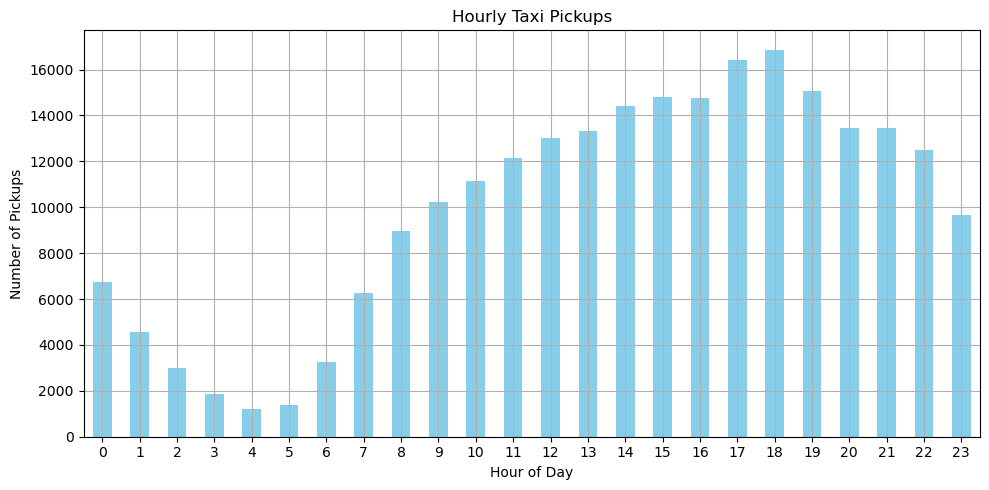

In [91]:

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday = 0, Sunday = 6
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Find and show the hourly trends in taxi pickups

hourly_pickups = df.groupby('pickup_hour').size()


plt.figure(figsize=(10, 5))
hourly_pickups.plot(kind='bar', color='skyblue')
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


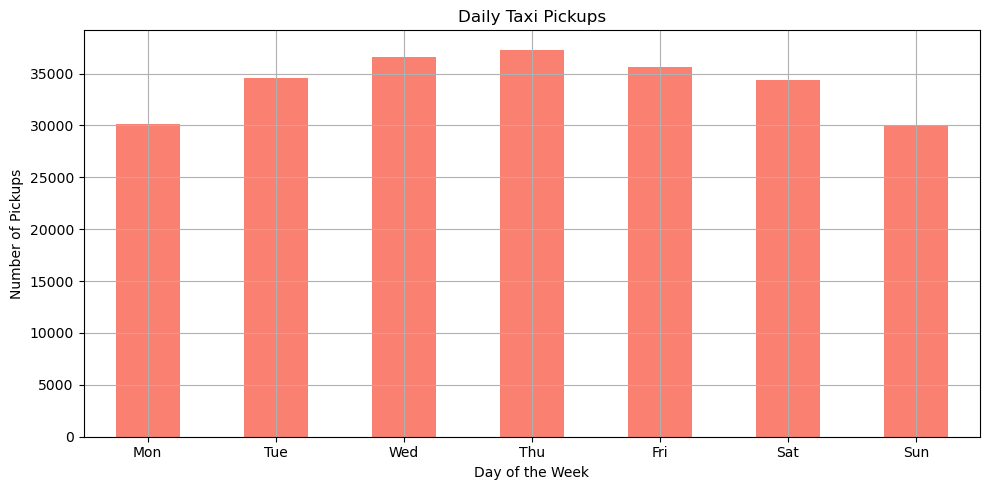

In [92]:
# Find and show the daily trends in taxi pickups (days of the week)
daily_pickups = df.groupby('pickup_dayofweek').size()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_pickups.index = days
plt.figure(figsize=(10, 5))
daily_pickups.plot(kind='bar', color='salmon')
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


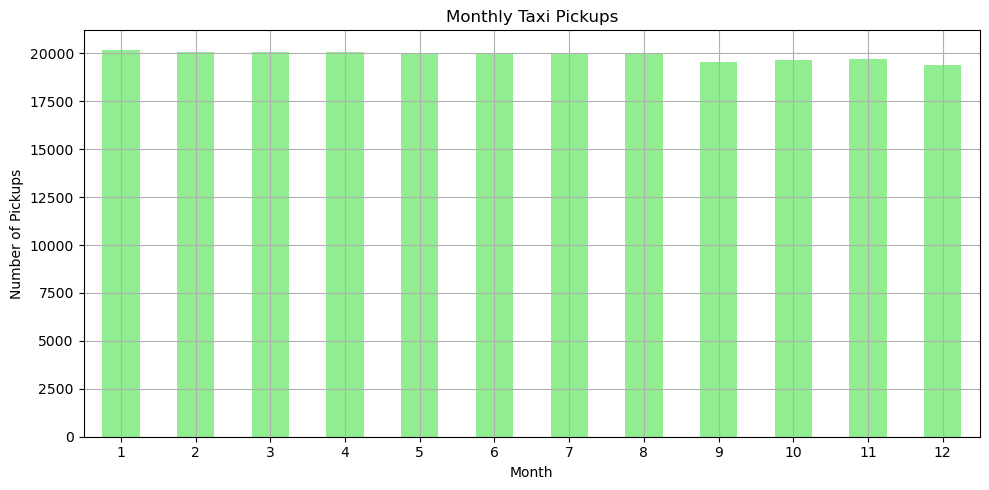

In [93]:
# Show the monthly trends in pickups
# Group by month
monthly_pickups = df.groupby('pickup_month').size()

# Plot
plt.figure(figsize=(10, 5))
monthly_pickups.plot(kind='bar', color='lightgreen')
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [94]:
# Analyse the above parameters

zero_or_negative_values = {
    'fare_amount': (df['fare_amount'] <= 0).sum(),
    'tip_amount': (df['tip_amount'] < 0).sum(),  # tip can be zero (not everyone tips)
    'total_amount': (df['total_amount'] <= 0).sum(),
    'trip_distance': (df['trip_distance'] <= 0).sum()
}

# Display
for k, v in zero_or_negative_values.items():
    print(f"{k}: {v} zero/negative values")

fare_amount: 167548 zero/negative values
tip_amount: 0 zero/negative values
total_amount: 27 zero/negative values
trip_distance: 180599 zero/negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [95]:
# Create a df with non zero entries for the selected parameters.
df_cleaned = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0) &
    (df['tip_amount'] >= 0)
]

print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_cleaned.shape}")



Original DataFrame shape: (238548, 22)
Filtered DataFrame shape: (55334, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

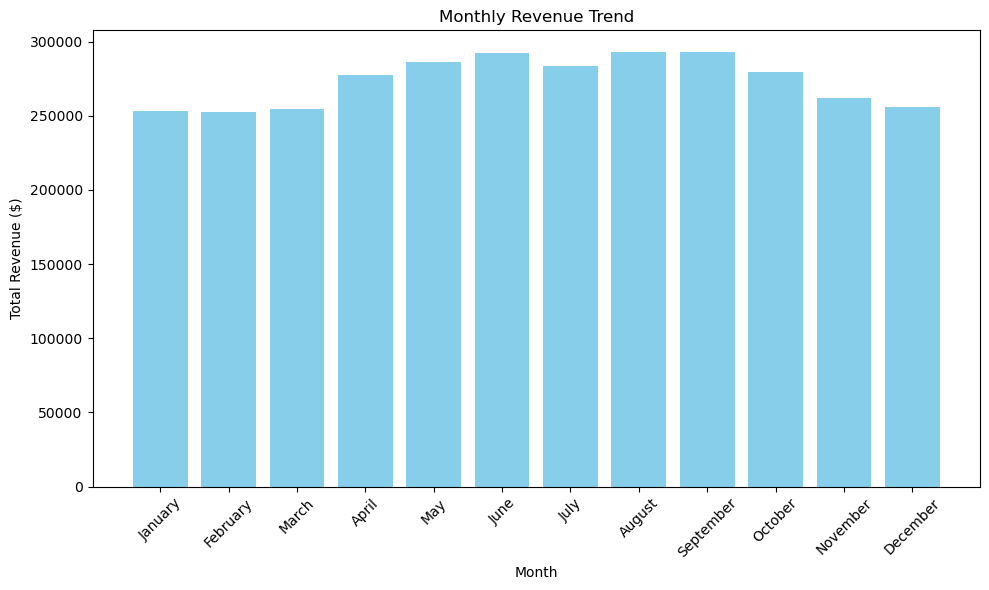

In [96]:
# Group data by month and analyse monthly revenue

df_cleaned['tpep_pickup_datetime'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime'])
df_cleaned['month'] = df_cleaned['tpep_pickup_datetime'].dt.month_name()
df_cleaned['month_num'] = df_cleaned['tpep_pickup_datetime'].dt.month
monthly_revenue = df_cleaned.groupby(['month_num', 'month'])['total_amount'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values(by='month_num')

plt.figure(figsize=(10,6))
plt.bar(monthly_revenue['month'], monthly_revenue['total_amount'], color='skyblue')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

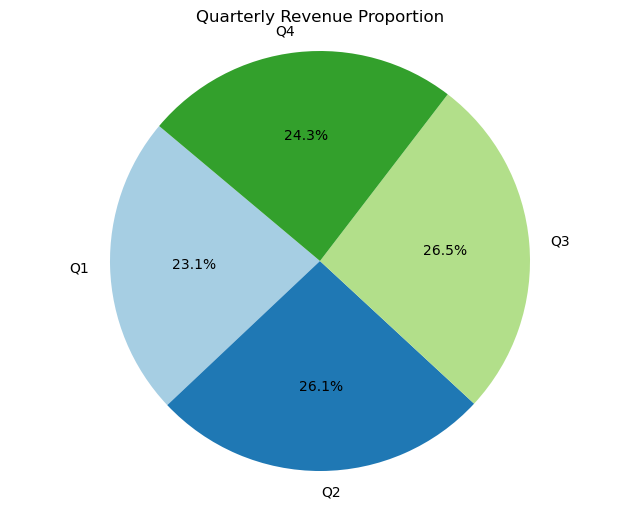

In [97]:
# Calculate proportion of each quarter

df_cleaned['quarter'] = df_cleaned['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = df_cleaned.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue * 100

plt.figure(figsize=(8,6))
plt.pie(
    quarterly_revenue['proportion'],
    labels=[f'Q{int(q)}' for q in quarterly_revenue['quarter']],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Quarterly Revenue Proportion')
plt.axis('equal')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

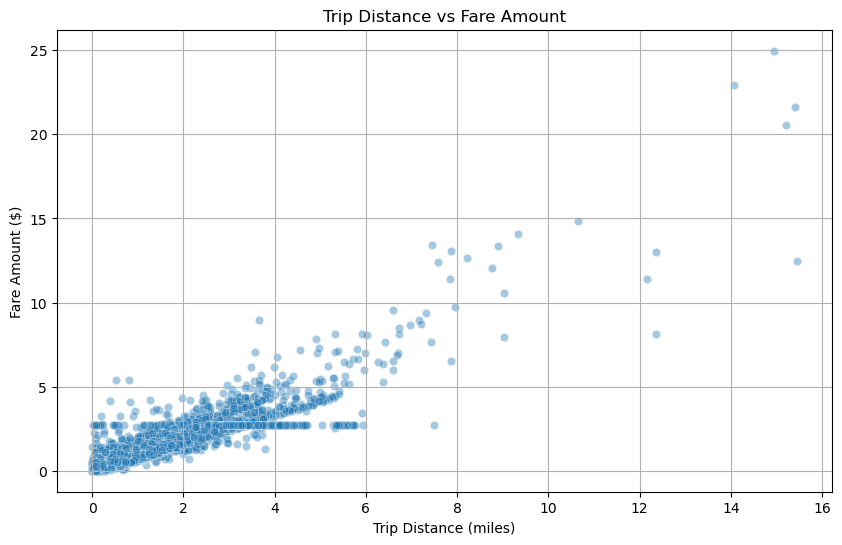

Correlation between trip distance and fare amount: 0.9178


In [98]:
# Show how trip fare is affected by distance

df_distance_fare = df_cleaned[df_cleaned['trip_distance'] > 0]


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_distance_fare.sample(10000),  
    x='trip_distance',
    y='fare_amount',
    alpha=0.4
)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df_distance_fare['trip_distance'].corr(df_distance_fare['fare_amount'])
print(f'Correlation between trip distance and fare amount: {correlation:.4f}')


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [99]:
# General
df_cleaned['trip_duration_minutes'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60

df_viz = df_cleaned[
    (df_cleaned['trip_duration_minutes'] > 0) & (df_cleaned['trip_duration_minutes'] < 120) &
    (df_cleaned['trip_distance'] > 0) &
    (df_cleaned['fare_amount'] > 0) &
    (df_cleaned['passenger_count'] > 0)
]

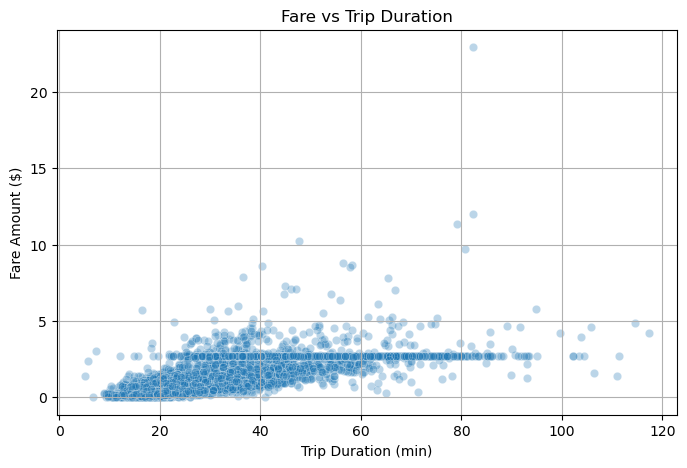

Correlation between fare and trip duration: 0.6762


In [100]:
# Show relationship between fare and trip duration
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_viz.sample(5000), x='trip_duration_minutes', y='fare_amount', alpha=0.3)
plt.title("Fare vs Trip Duration")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

cor1 = df_viz['fare_amount'].corr(df_viz['trip_duration_minutes'])
print(f'Correlation between fare and trip duration: {cor1:.4f}')

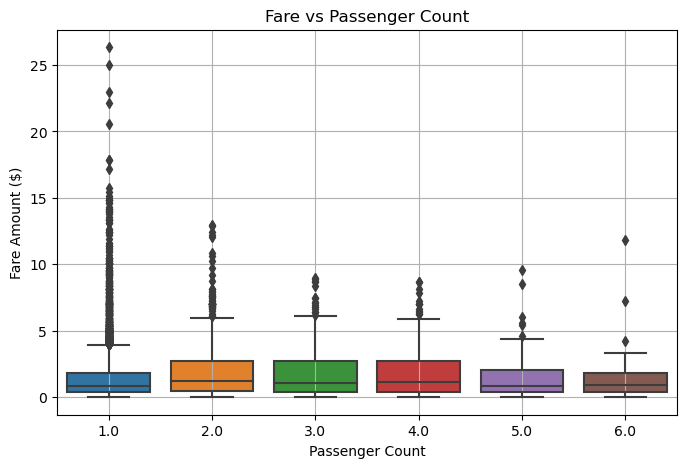

Correlation between fare and passenger count: 0.0546


In [101]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8,5))
sns.boxplot(data=df_viz, x='passenger_count', y='fare_amount')
plt.title("Fare vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

cor2 = df_viz['fare_amount'].corr(df_viz['passenger_count'])
print(f'Correlation between fare and passenger count: {cor2:.4f}')




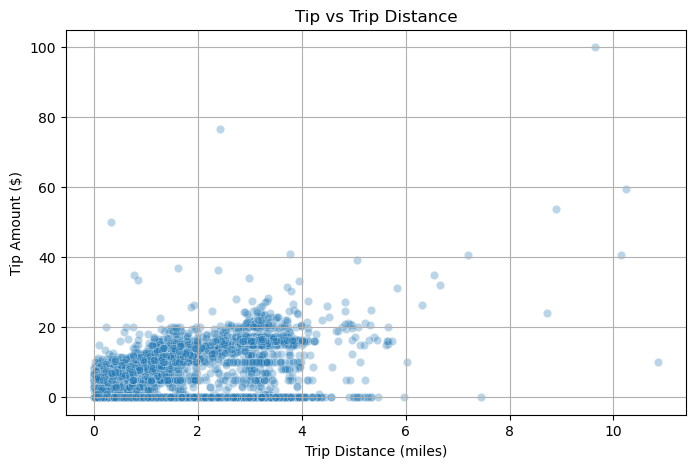

Correlation between tip and trip distance: 0.4201


In [102]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_viz.sample(5000), x='trip_distance', y='tip_amount', alpha=0.3)
plt.title("Tip vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.show()

cor3 = df_viz['tip_amount'].corr(df_viz['trip_distance'])
print(f'Correlation between tip and trip distance: {cor3:.4f}')


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

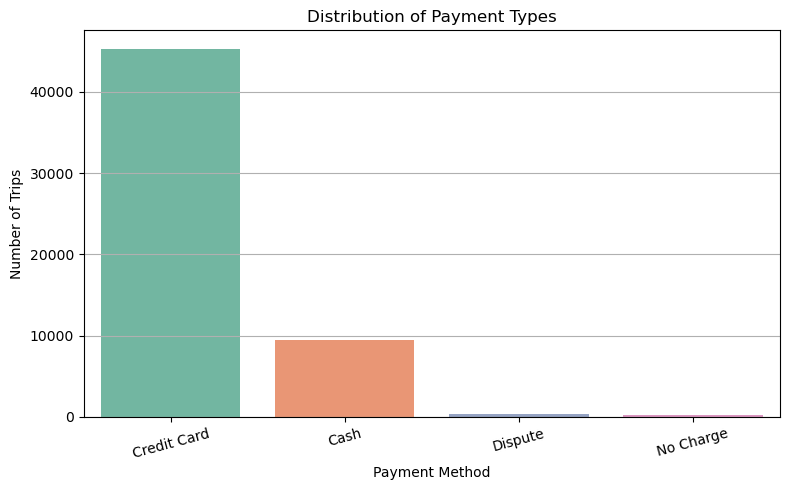

In [103]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

df_cleaned['payment_type_label'] = df_cleaned['payment_type'].map(payment_labels)


payment_counts = df_cleaned['payment_type_label'].value_counts()


plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Trips")
plt.xticks(rotation=15)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [104]:
!pip install geopandas

     -------------------------------------- 323.6/323.6 kB 3.3 MB/s eta 0:00:00
     --------------------------------------- 16.2/16.2 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 6.3/6.3 MB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 13.6 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [111]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp")# read the .shp file using gpd
print(zones.info())
zones.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

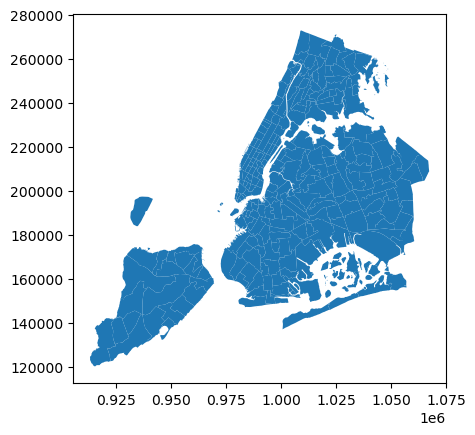

In [112]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [113]:
# Merge zones and trip records using locationID and PULocationID

# Rename LocationID column in zones to match with trip data
zones = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge zones into trip data using PULocationID
trip_with_pickup_zones = df.merge(zones[['PULocationID', 'zone', 'borough']], on='PULocationID', how='left')

# Preview the merged DataFrame
trip_with_pickup_zones[['PULocationID', 'zone', 'borough']].head()


PULocationID                           zone    borough
0           262                 Yorkville East  Manhattan
1           229  Sutton Place/Turtle Bay North  Manhattan
2            45                      Chinatown  Manhattan
3           237          Upper East Side South  Manhattan
4           229  Sutton Place/Turtle Bay North  Manhattan

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [114]:
# Group data by location and calculate the number of trips

trip_counts = trip_with_pickup_zones.groupby('PULocationID').size().reset_index(name='trip_count')
trip_counts.head()



PULocationID  trip_count
0             1          41
1             2           1
2             3           5
3             4         232
4             5           2

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [115]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trip_counts, on='PULocationID', how='left')
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        41.0  
1         1.0  
2         5.0  
3       232.0  
4         2.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

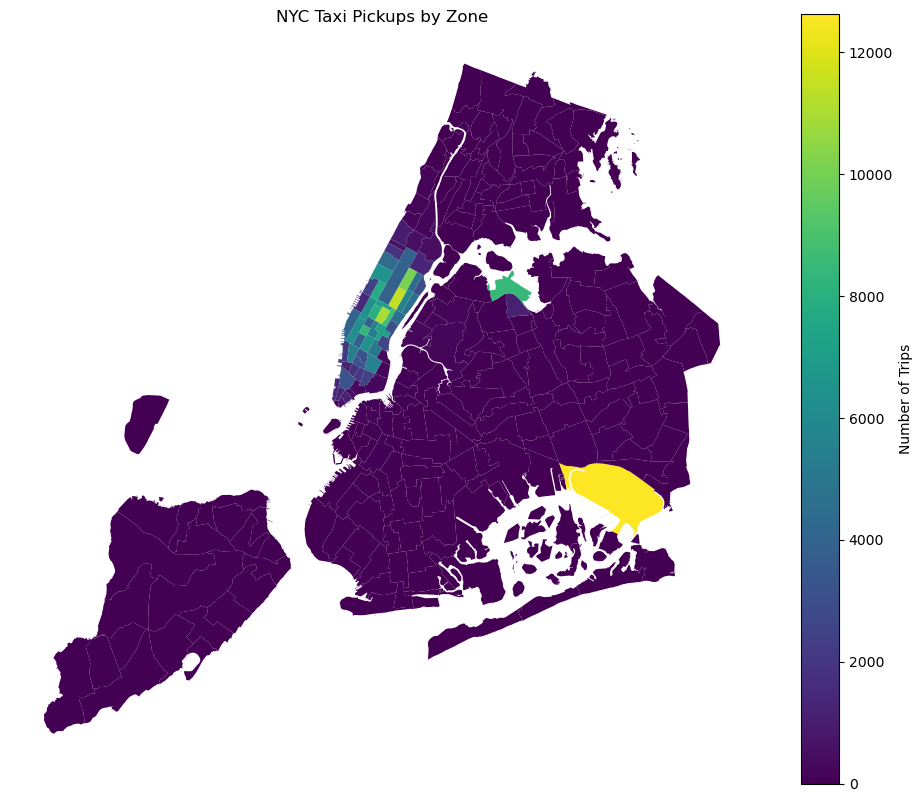

In [117]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='viridis',
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)

plt.title("NYC Taxi Pickups by Zone")
plt.axis('off')
plt.show()


In [118]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips.sort_values(by='trip_count', ascending=False)[['zone', 'borough', 'trip_count']].head(10)

zone    borough  trip_count
131                   JFK Airport     Queens     12632.0
236         Upper East Side South  Manhattan     11476.0
160                Midtown Center  Manhattan     11083.0
235         Upper East Side North  Manhattan     10025.0
161                  Midtown East  Manhattan      8742.0
137             LaGuardia Airport     Queens      8445.0
185  Penn Station/Madison Sq West  Manhattan      8366.0
229     Times Sq/Theatre District  Manhattan      7986.0
141           Lincoln Square East  Manhattan      7759.0
169                   Murray Hill  Manhattan      7217.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [119]:
# Find routes which have the slowest speeds at different times of the day

# Ensure datetime columns are in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in seconds
df['trip_duration_sec'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

# Convert to hours
df['trip_duration_hr'] = df['trip_duration_sec'] / 3600

# Calculate speed in mph
df['speed_mph'] = df['trip_distance'] / df['trip_duration_hr']

# Remove unrealistic values (optional cleanup)
df = df[(df['speed_mph'] > 0) & (df['speed_mph'] < 100)]

# Find the slowest trips (lowest average speed)
slowest_trips = df.sort_values(by='speed_mph').head(10)
slowest_trips[['PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration_hr', 'speed_mph']]



PULocationID  DOLocationID  trip_distance  trip_duration_hr  speed_mph
89803            239           234       0.012695         23.896667   0.000531
85331            141           113       0.014894         23.812778   0.000625
55508            237           202       0.028088         23.364444   0.001202
909              238           116       0.039083         23.710000   0.001648
236564           249           239       0.001700          0.958611   0.001773
180214           125           246       0.001700          0.887500   0.001916
61268            170            75       0.001700          0.667778   0.002546
124446           186           140       0.001700          0.614444   0.002767
96093            229           158       0.001700          0.600000   0.002833
227427           163            79       0.001700          0.597500   0.002845

In [120]:
# Merge for PULocationID
slowest_trips = slowest_trips.merge(zones[['PULocationID', 'zone']], on='PULocationID', how='left').rename(columns={'zone': 'pickup_zone'})

# Merge for DOLocationID
zones_dropped = zones.rename(columns={'PULocationID': 'DOLocationID', 'zone': 'dropoff_zone'})
slowest_trips = slowest_trips.merge(zones_dropped[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')

# Final look at slowest routes
slowest_trips[['pickup_zone', 'dropoff_zone', 'trip_distance', 'trip_duration_hr', 'speed_mph']]


pickup_zone                   dropoff_zone  \
0          Upper West Side South                       Union Sq   
1                Lenox Hill West        Greenwich Village North   
2          Upper East Side South               Roosevelt Island   
3          Upper West Side North               Hamilton Heights   
4                   West Village          Upper West Side South   
5                      Hudson Sq      West Chelsea/Hudson Yards   
6                    Murray Hill              East Harlem South   
7   Penn Station/Madison Sq West                Lenox Hill East   
8  Sutton Place/Turtle Bay North  Meatpacking/West Village West   
9                  Midtown North                   East Village   

   trip_distance  trip_duration_hr  speed_mph  
0       0.012695         23.896667   0.000531  
1       0.014894         23.812778   0.000625  
2       0.028088         23.364444   0.001202  
3       0.039083         23.710000   0.001648  
4       0.001700          0.958611   0.001773  
5       0.001700          0.887500   0.001916  
6       0.001700          0.667778   0.002546  
7       0.001700          0.614444   0.002767  
8       0.001700          0.600000   0.002833  
9       0.001700          0.597500   0.002845

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

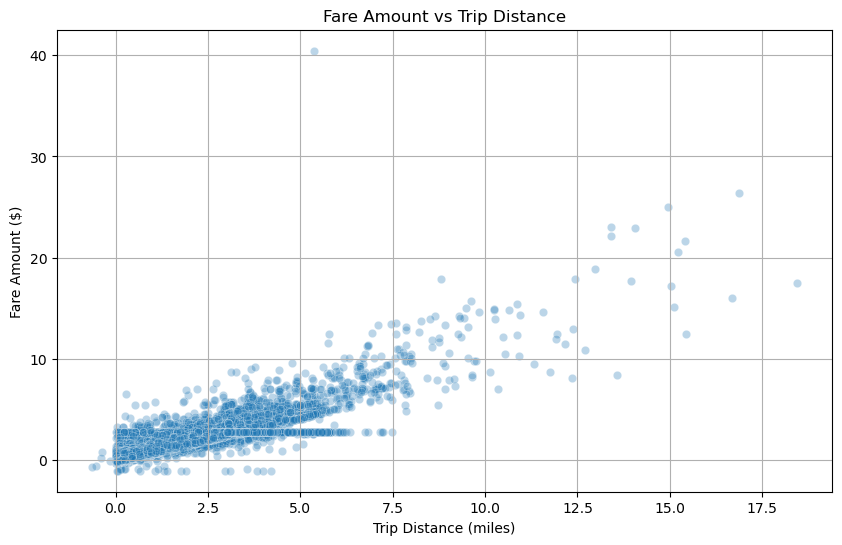

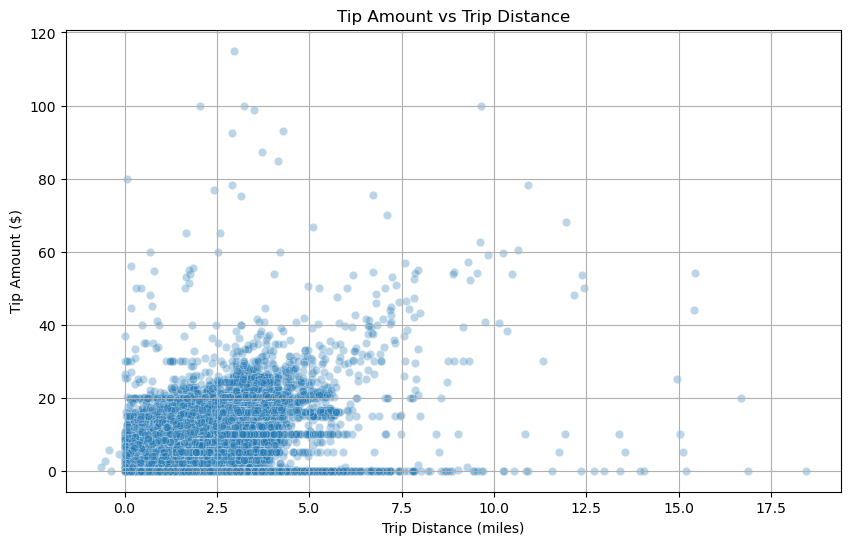

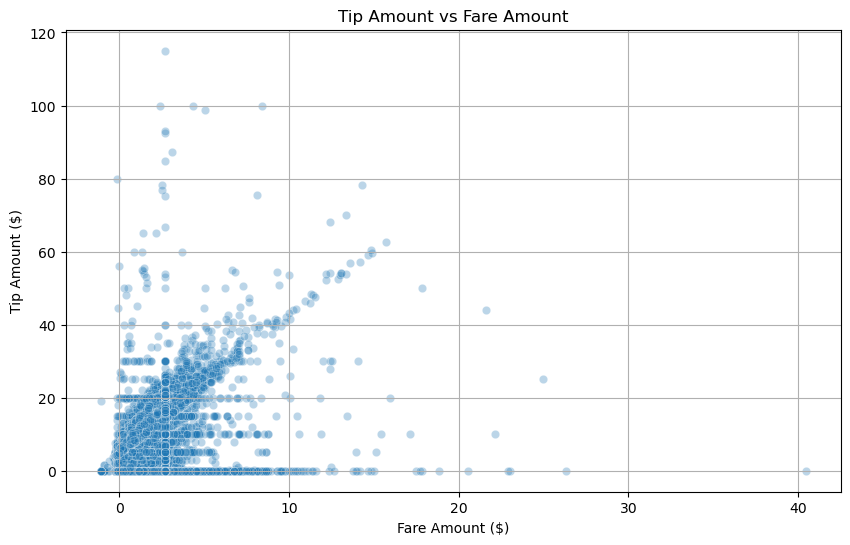

In [122]:
# Visualise the number of trips per hour and find the busiest hour
# Fare vs. Trip Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

# Tip vs. Trip Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

#Tip vs. Fare (do people tip more on higher fare?)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fare_amount', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [123]:
#average tip percentage:
df['tip_pct'] = (df['tip_amount'] / df['fare_amount']) * 100
df['tip_pct'].describe()

count    5.792200e+04
mean     1.634791e+04
std      1.443968e+05
min     -7.074290e+04
25%      0.000000e+00
50%      6.588854e+02
75%      1.243012e+03
max      1.318905e+07
Name: tip_pct, dtype: float64

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [127]:
# Scale up the number of trips

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trip_counts = df.groupby('pickup_hour').size().reset_index(name='trip_count')
top5_hours = hourly_trip_counts.sort_values(by='trip_count', ascending=False).head(5)

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01
top5_hours['estimated_total_trips'] = (top5_hours['trip_count'] / sample_fraction).astype(int)

print("Top 5 Busiest Hours (Scaled Estimates):")
print(top5_hours)

Top 5 Busiest Hours (Scaled Estimates):
    pickup_hour  trip_count  estimated_total_trips
21           21        3610                 361000
22           22        3565                 356500
16           16        3458                 345800
14           14        3428                 342800
15           15        3408                 340800


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

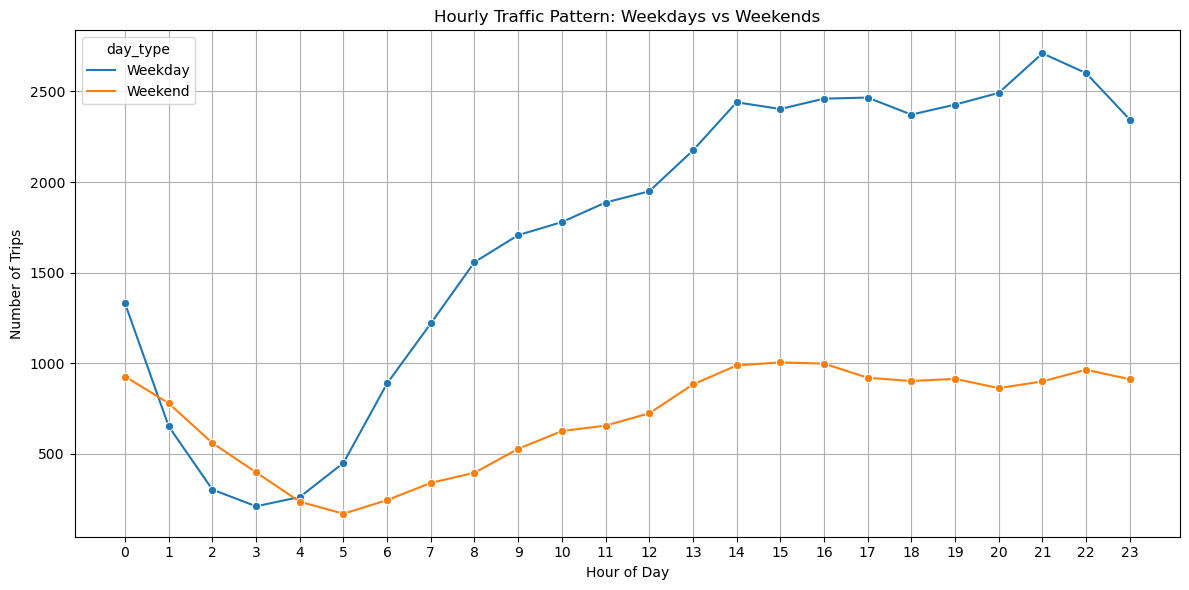

In [128]:
# Compare traffic trends for the week days and weekends

# Extract weekday and hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Add a 'day_type' column: 'Weekday' or 'Weekend'
df['day_type'] = df['pickup_weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_traffic = df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_traffic, x='pickup_hour', y='trip_count', hue='day_type', marker='o')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [129]:
# Find top 10 pickup and dropoff zones
# Top 10 pickup zones by total pickup count
top_pickup_zones = df['PULocationID'].value_counts().head(10).index
pickup_hourly = df[df['PULocationID'].isin(top_pickup_zones)]
pickup_trends = pickup_hourly.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='trip_count')
# Top 10 dropoff zones by total dropoff count
top_dropoff_zones = df['DOLocationID'].value_counts().head(10).index
dropoff_hourly = df[df['DOLocationID'].isin(top_dropoff_zones)]
dropoff_trends = dropoff_hourly.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='trip_count')


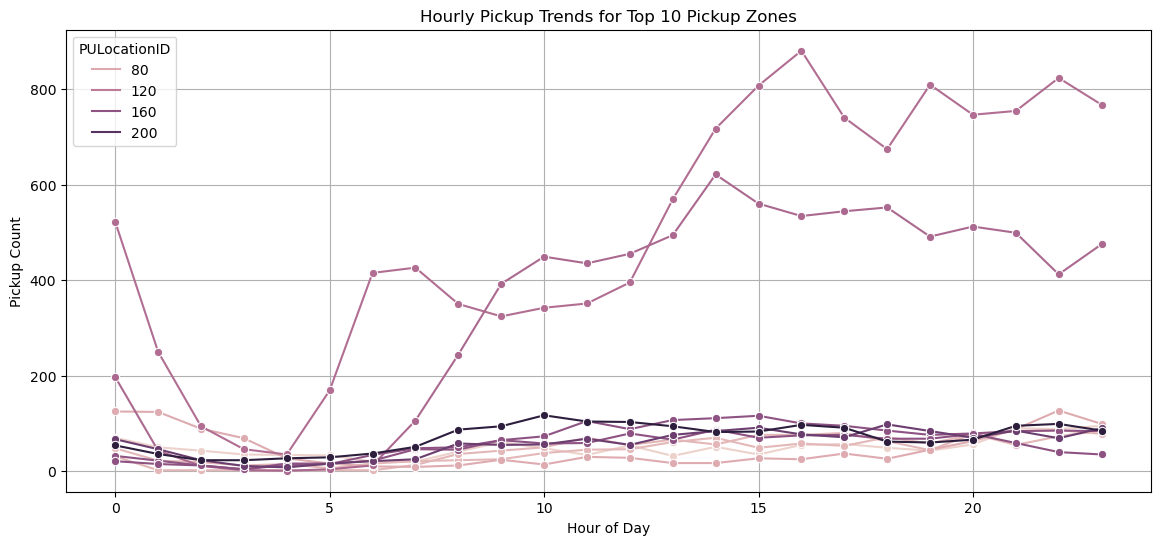

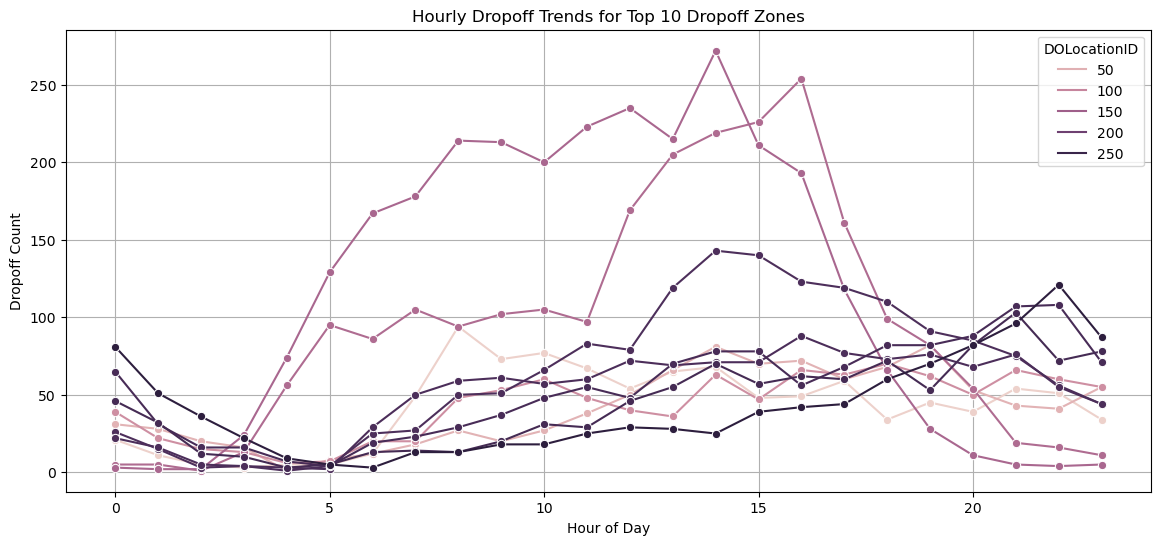

In [130]:
# Plot pickup trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='trip_count', hue='PULocationID', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Count')
plt.grid(True)
plt.show()

# Plot dropoff trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_trends, x='pickup_hour', y='trip_count', hue='DOLocationID', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Dropoff Count')
plt.grid(True)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [147]:
print(zones.columns)

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'PULocationID',
       'borough', 'geometry'],
      dtype='object')


In [9]:
import pandas as pd
import zipfile
import io

zip_path = 'trip records.zip'
monthly_dfs = []

try:
    with zipfile.ZipFile(zip_path) as z:
        parquet_files = [f for f in z.namelist() if f.endswith('.parquet')]
        parquet_files.sort()
        
        # Load only the first 2 months
        for file in parquet_files[:2]:
            with z.open(file) as f:
                df = pd.read_parquet(io.BytesIO(f.read()))
                monthly_dfs.append(df)
                print(f"Loaded {file} with {len(df)} records")

        # Combine only the selected months
        full_df = pd.concat(monthly_dfs, ignore_index=True)
        print(f"Combined dataset has {len(full_df)} rows")

except Exception as e:
    print(f"Error: {e}")
    full_df = None


Loaded self download/2023-01.parquet with 3066766 records
Loaded self download/2023-02.parquet with 2913955 records
Combined dataset has 5980721 rows


In [21]:
import geopandas as gpd

# Load the NYC Taxi Zones shapefile
zones = gpd.read_file("taxi_zones.shp")

# Confirm it's loaded properly
print(zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


In [14]:
sample_df = pd.concat(monthly_dfs, ignore_index=True)
sample_df = pd.concat(monthly_dfs, ignore_index=True)


In [23]:
# Step 1: Count pickups and dropoffs per zone
pickup_counts = sample_df['PULocationID'].value_counts().rename("pickups")
dropoff_counts = sample_df['DOLocationID'].value_counts().rename("dropoffs")

# Step 2: Combine into one DataFrame and reset index to preserve the LocationID
zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0).reset_index()
zone_ratios.rename(columns={"index": "LocationID"}, inplace=True)

# Step 3: Compute pickup/dropoff ratio
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickups'] / zone_ratios['dropoffs'].replace(0, 1)

# Step 4: Merge with zone names using 'LocationID'
zone_ratios_named = zone_ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')


In [24]:

# Find the top 10 and bottom 10 pickup/dropoff ratios

# Step 5: Display top 10 and bottom 10 zones by pickup/dropoff ratio
print("Top 10 zones by pickup/dropoff ratio:")
display(zone_ratios_named.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10))

print("\nBottom 10 zones by pickup/dropoff ratio:")
display(zone_ratios_named.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10))

Top 10 zones by pickup/dropoff ratio:


LocationID   pickups  dropoffs  pickup_dropoff_ratio  \
48           70   25087.0    3176.0              7.898929   
0           132  292124.0   64496.0              4.529335   
8           138  173693.0   65020.0              2.671378   
257         199       2.0       0.0              2.000000   
4           186  213803.0  132730.0              1.610811   
32          264   75075.0   48997.0              1.532237   
30          114   78767.0   56756.0              1.387818   
26           43   95096.0   70205.0              1.354547   
18          249  133478.0   99318.0              1.343946   
5           162  207241.0  161114.0              1.286300   

                             zone  
48                  East Elmhurst  
0                     JFK Airport  
8               LaGuardia Airport  
257                 Rikers Island  
4    Penn Station/Madison Sq West  
32                            NaN  
30        Greenwich Village South  
26                   Central Park  
18                   West Village  
5                    Midtown East


Bottom 10 zones by pickup/dropoff ratio:


LocationID  pickups  dropoffs  pickup_dropoff_ratio  \
262          84      0.0      37.0              0.000000   
261          27      0.0      76.0              0.000000   
260         176      1.0      42.0              0.023810   
258         111      2.0      53.0              0.037736   
255         245      3.0      74.0              0.040541   
91            1    805.0   15573.0              0.051692   
245          58      8.0     149.0              0.053691   
187         257    132.0    2454.0              0.053790   
166         202    192.0    3361.0              0.057126   
223         252     66.0    1118.0              0.059034   

                                    zone  
262    Eltingville/Annadale/Prince's Bay  
261  Breezy Point/Fort Tilden/Riis Beach  
260                              Oakwood  
258                  Green-Wood Cemetery  
255                        West Brighton  
91                        Newark Airport  
245                         Country Club  
187                      Windsor Terrace  
166                     Roosevelt Island  
223                           Whitestone

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [29]:
import pandas as pd

# Step 1: Ensure datetime format
sample_df['tpep_pickup_datetime'] = pd.to_datetime(sample_df['tpep_pickup_datetime'])
sample_df['tpep_dropoff_datetime'] = pd.to_datetime(sample_df['tpep_dropoff_datetime'])

# Step 2: Extract pickup and dropoff hours
sample_df['pickup_hour'] = sample_df['tpep_pickup_datetime'].dt.hour
sample_df['dropoff_hour'] = sample_df['tpep_dropoff_datetime'].dt.hour

# Step 3: Define night hours (11PM to 5AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Step 4: Filter trips where pickup or dropoff was during night
night_df = sample_df[
    sample_df['pickup_hour'].isin(night_hours) |
    sample_df['dropoff_hour'].isin(night_hours)
]



In [30]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Step 5: Count pickups and dropoffs during night hours
night_pickups = night_df[night_df['pickup_hour'].isin(night_hours)]['PULocationID'].value_counts().rename("night_pickups")
night_dropoffs = night_df[night_df['dropoff_hour'].isin(night_hours)]['DOLocationID'].value_counts().rename("night_dropoffs")

# Step 6: Combine pickup and dropoff counts into one DataFrame
night_traffic = pd.concat([night_pickups, night_dropoffs], axis=1).fillna(0)
night_traffic = night_traffic.reset_index().rename(columns={'index': 'LocationID'})

# Step 7: Merge with zone names
night_traffic_named = night_traffic.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Step 8: Sort and display top 10 pickup and dropoff zones
top_night_pickups = night_traffic_named.sort_values(by='night_pickups', ascending=False).head(10)
top_night_dropoffs = night_traffic_named.sort_values(by='night_dropoffs', ascending=False).head(10)

# Step 9: Print results
print("Top 10 Pickup Zones (11PM - 5AM):")
print(top_night_pickups[['zone', 'night_pickups']])

print("\nTop 10 Dropoff Zones (11PM - 5AM):")
print(top_night_dropoffs[['zone', 'night_dropoffs']])

# Note that the top zones should be of night hours and not the overall top zones



Top 10 Pickup Zones (11PM - 5AM):
                           zone  night_pickups
0                  East Village        56254.0
1                  West Village        41075.0
2                   JFK Airport        39766.0
3                  Clinton East        33901.0
4               Lower East Side        33506.0
5       Greenwich Village South        28818.0
6     Times Sq/Theatre District        26074.0
7  Penn Station/Madison Sq West        20633.0
8                      Gramercy        19701.0
9                 Midtown South        18988.0

Top 10 Dropoff Zones (11PM - 5AM):
                             zone  night_dropoffs
0                    East Village         30131.0
3                    Clinton East         24490.0
17                    Murray Hill         21473.0
20                Lenox Hill West         19603.0
8                        Gramercy         19554.0
10                   East Chelsea         19095.0
16                 Yorkville West         19052.0
1            

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [31]:
# Ensure pickup datetime is in datetime format
sample_df['tpep_pickup_datetime'] = pd.to_datetime(sample_df['tpep_pickup_datetime'])

# Extract hour
sample_df['hour'] = sample_df['tpep_pickup_datetime'].dt.hour

# Filter for night hours (11 PM to 5 AM)
sample_df['time_period'] = sample_df['hour'].apply(lambda x: 'night' if (x >= 23 or x < 5) else 'day')

# Calculate total revenue (you can change 'fare_amount' to 'total_amount' if needed)
revenue_by_period = sample_df.groupby('time_period')['fare_amount'].sum()

# Calculate revenue share
total_revenue = revenue_by_period.sum()
revenue_share = (revenue_by_period / total_revenue) * 100

# Display result
print("Revenue Share:")
print(revenue_share.round(2))



Revenue Share:
time_period
day      88.55
night    11.45
Name: fare_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [32]:
# Analyse the fare per mile per passenger for different passenger counts

# Step 1: Filter valid data
valid_pricing = sample_df[
    (sample_df['fare_amount'] > 0) &
    (sample_df['trip_distance'] > 0) &
    (sample_df['passenger_count'] > 0)
].copy()

# Step 2: Compute fare per mile per passenger
valid_pricing['fare_per_mile_per_passenger'] = valid_pricing['fare_amount'] / (
    valid_pricing['trip_distance'] * valid_pricing['passenger_count']
)

# Step 3: Group by passenger count and compute average
avg_fare_per_mile_per_passenger = valid_pricing.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().round(2)

# Step 4: Display result
print("Average Fare per Mile per Passenger by Passenger Count:")
print(avg_fare_per_mile_per_passenger)

Average Fare per Mile per Passenger by Passenger Count:
passenger_count
1.0     10.04
2.0      5.91
3.0      3.53
4.0      3.40
5.0      1.61
6.0      1.40
7.0    363.62
8.0    177.73
9.0     27.69
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [33]:
# Compare the average fare per mile for different days and for different times of the day
# Step 1: Create fare_per_mile column, avoiding division by zero
sample_df = sample_df[sample_df['trip_distance'] > 0]
sample_df['fare_per_mile'] = sample_df['fare_amount'] / sample_df['trip_distance']

# Step 2: Extract hour and day of week
sample_df['hour'] = sample_df['tpep_pickup_datetime'].dt.hour
sample_df['day_of_week'] = sample_df['tpep_pickup_datetime'].dt.day_name()

# Step 3: Group and calculate average fare per mile
avg_fare_by_hour = sample_df.groupby('hour')['fare_per_mile'].mean()
avg_fare_by_day = sample_df.groupby('day_of_week')['fare_per_mile'].mean()

# Step 4 (Optional): Order days of week for clarity
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_by_day = avg_fare_by_day.reindex(ordered_days)

# Step 5: Display results
print("Average Fare per Mile by Hour:")
print(avg_fare_by_hour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avg_fare_by_day)


Average Fare per Mile by Hour:
hour
0      8.706820
1      8.381785
2      7.986715
3      8.877370
4     12.637100
5     12.858393
6      8.852774
7      8.698765
8      9.288960
9      9.490599
10     9.674398
11     9.382008
12     9.683617
13     9.969795
14    10.129591
15    10.280319
16    10.519384
17     9.487009
18     9.510190
19     9.261234
20     8.624591
21     8.452638
22     8.247330
23     8.950767
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Day of the Week:
day_of_week
Monday       9.242852
Tuesday      9.364977
Wednesday    9.371344
Thursday     9.448997
Friday       9.718181
Saturday     9.294684
Sunday       9.463458
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [34]:
# Compare fare per mile for different vendors
# First, ensure hour column is available
sample_df['hour'] = sample_df['tpep_pickup_datetime'].dt.hour

# Compute average fare per mile by vendor and hour
vendor_hourly_fare = sample_df.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

# Pivot for a cleaner display (optional)
vendor_hourly_fare_pivot = vendor_hourly_fare.pivot(index='hour', columns='VendorID', values='fare_per_mile')

# Display the result
print("Average Fare per Mile by Vendor and Hour:")
display(vendor_hourly_fare_pivot)

Average Fare per Mile by Vendor and Hour:


VendorID         1          2         6
hour                                   
0         6.696097   9.316405  4.632402
1         6.654801   8.899852  4.468397
2         6.615729   8.395226  9.620253
3         6.632343   9.530936  4.257133
4         6.937963  14.424121  4.844662
5         6.443131  15.459835  3.015280
6         6.691907   9.802239  3.508728
7         7.144761   9.332024  4.594132
8         7.774845   9.880191  5.703845
9         7.977076  10.074330  7.540644
10        7.927072  10.358795  8.989670
11        8.077492   9.895456  9.304323
12        8.056037  10.330964  8.413839
13        8.154295  10.692740  9.441587
14        7.985897  10.977822  8.958341
15        8.120716  11.135947  6.281058
16        8.033948  11.495280  7.150531
17        8.048506  10.035475  6.460665
18        7.885276  10.097512  5.060477
19        7.562377   9.843577  4.251168
20        7.118788   9.127950  4.316489
21        6.871890   8.962952  3.688254
22        6.744219   8.714438  4.009272
23        6.595115   9.668830  3.621764

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [38]:
import pandas as pd
import numpy as np

# Defining distance tiers
# Step 1: Define distance tiers
def categorize_distance(dist):
    if dist <= 2:
        return 'Tier 1: ≤2 miles'
    elif dist <= 5:
        return 'Tier 2: 2–5 miles'
    else:
        return 'Tier 3: >5 miles'

sample_df['distance_tier'] = sample_df['trip_distance'].apply(categorize_distance)

# Step 2: Calculate fare per mile
sample_df['fare_per_mile'] = sample_df['fare_amount'] / sample_df['trip_distance']
sample_df = sample_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['fare_per_mile'])

# Step 3: Group by VendorID and distance_tier
tiered_fare = sample_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

# Display results
print("Average Fare per Mile by Vendor and Distance Tier:")
print(tiered_fare)




Average Fare per Mile by Vendor and Distance Tier:
distance_tier  Tier 1: ≤2 miles  Tier 2: 2–5 miles  Tier 3: >5 miles
VendorID                                                            
1                      9.195111           6.046672          4.322317
2                     13.970729           6.124396          4.304794
6                     29.567022           7.943787          4.216939


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [39]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
sample_df["tip_percentage"] = (sample_df["tip_amount"] / sample_df["fare_amount"]) * 100

# Filter reasonable values
filtered_tips = sample_df[(sample_df["fare_amount"] > 0) & (sample_df["tip_percentage"] <= 100)]

# Group by trip distance ranges
distance_bins = pd.cut(filtered_tips["trip_distance"], bins=[0, 2, 5, 10, 20, 100], 
                       labels=["0–2mi", "2–5mi", "5–10mi", "10–20mi", "20mi+"])
tip_by_distance = filtered_tips.groupby(distance_bins)["tip_percentage"].mean()
print("Average Tip % by Distance:\n", tip_by_distance)

tip_by_passengers = filtered_tips.groupby("passenger_count")["tip_percentage"].mean()
print("\nAverage Tip % by Passenger Count:\n", tip_by_passengers)

filtered_tips["pickup_hour"] = filtered_tips["tpep_pickup_datetime"].dt.hour
tip_by_hour = filtered_tips.groupby("pickup_hour")["tip_percentage"].mean()
print("\nAverage Tip % by Hour of Day:\n", tip_by_hour)


Average Tip % by Distance:
 trip_distance
0–2mi      22.531157
2–5mi      18.802280
5–10mi     16.951079
10–20mi    15.954356
20mi+      14.319872
Name: tip_percentage, dtype: float64

Average Tip % by Passenger Count:
 passenger_count
0.0    19.981044
1.0    20.683059
2.0    19.987083
3.0    19.514617
4.0    18.065100
5.0    20.787847
6.0    20.659154
7.0    17.954987
8.0     9.765686
9.0    22.245753
Name: tip_percentage, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21520\2768477561.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tips["pickup_hour"] = filtered_tips["tpep_pickup_datetime"].dt.hour



Average Tip % by Hour of Day:
 pickup_hour
0     20.215352
1     20.478333
2     20.120820
3     19.421349
4     17.355875
5     16.905268
6     17.904006
7     19.361804
8     19.913598
9     19.771181
10    19.443465
11    19.368420
12    19.374014
13    19.223795
14    19.183640
15    19.280986
16    21.184388
17    21.867807
18    22.400552
19    22.351916
20    21.585537
21    21.646247
22    21.155587
23    20.579846
Name: tip_percentage, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [40]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tips = filtered_tips[filtered_tips["tip_percentage"] < 10]
high_tips = filtered_tips[filtered_tips["tip_percentage"] > 25]

comparison = pd.DataFrame({
    "Low Tip (avg distance)": low_tips["trip_distance"].mean(),
    "High Tip (avg distance)": high_tips["trip_distance"].mean(),
    "Low Tip (avg fare)": low_tips["fare_amount"].mean(),
    "High Tip (avg fare)": high_tips["fare_amount"].mean(),
    "Low Tip (avg passengers)": low_tips["passenger_count"].mean(),
    "High Tip (avg passengers)": high_tips["passenger_count"].mean(),
}, index=["Values"]).T

print("\nComparison of Low Tip vs High Tip Scenarios:\n", comparison)




Comparison of Low Tip vs High Tip Scenarios:
                               Values
Low Tip (avg distance)      3.994779
High Tip (avg distance)     2.602880
Low Tip (avg fare)         20.344121
High Tip (avg fare)        13.642222
Low Tip (avg passengers)    1.387486
High Tip (avg passengers)   1.346153


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [42]:
# See how passenger count varies across hours and days
# Sample 200,000 rows to reduce memory load
df_sample = df.sample(n=200000, random_state=42)

# Extract hour and day of week from the pickup time
df_sample["hour"] = df_sample["tpep_pickup_datetime"].dt.hour
df_sample["day_of_week"] = df_sample["tpep_pickup_datetime"].dt.day_name()

# Group by hour and calculate average passenger count
avg_passengers_by_hour = df_sample.groupby("hour")["passenger_count"].mean()

# Group by day and calculate average passenger count
avg_passengers_by_day = df_sample.groupby("day_of_week")["passenger_count"].mean()

# Order days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_passengers_by_day = avg_passengers_by_day.loc[day_order]

# Show results
print("Average Passenger Count by Hour:\n", avg_passengers_by_hour)
print("\nAverage Passenger Count by Day of Week:\n", avg_passengers_by_day)



Average Passenger Count by Hour:
 hour
0     1.430217
1     1.440901
2     1.437003
3     1.448276
4     1.425574
5     1.304829
6     1.252074
7     1.259580
8     1.278165
9     1.284873
10    1.318042
11    1.338077
12    1.331381
13    1.352356
14    1.365256
15    1.373183
16    1.358382
17    1.355639
18    1.334103
19    1.339856
20    1.357755
21    1.398830
22    1.408731
23    1.412356
Name: passenger_count, dtype: float64

Average Passenger Count by Day of Week:
 day_of_week
Monday       1.329244
Tuesday      1.303711
Wednesday    1.304971
Thursday     1.296696
Friday       1.361640
Saturday     1.457943
Sunday       1.432265
Name: passenger_count, dtype: float64


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [43]:
# How does passenger count vary across zones

# Group by pickup location to calculate average passenger count
avg_passenger_by_zone = df.groupby("PULocationID")["passenger_count"].mean().reset_index()
avg_passenger_by_zone.columns = ["LocationID", "avg_passenger_count"]

# Merge with zone names and geometries
zones_with_passenger = zones.merge(avg_passenger_by_zone, on="LocationID", how="left")

# Fill missing values with 0 if any (for zones with no trips)
zones_with_passenger["avg_passenger_count"] = zones_with_passenger["avg_passenger_count"].fillna(0)

# Sort and view top zones with highest average passenger count
top_passenger_zones = zones_with_passenger.sort_values(by="avg_passenger_count", ascending=False)[["zone", "avg_passenger_count"]].head(10)
print("Top 10 Zones by Average Passenger Count:\n", top_passenger_zones)


Top 10 Zones by Average Passenger Count:
                             zone  avg_passenger_count
5        Arrochar/Fort Wadsworth             2.187500
117  Heartland Village/Todt Hill             2.166667
252                Willets Point             2.125000
108                  Great Kills             2.000000
57                  Country Club             2.000000
149              Manhattan Beach             1.763158
30                    Bronx Park             1.750000
11                  Battery Park             1.727053
10                    Bath Beach             1.690476
0                 Newark Airport             1.597468


In [44]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Count how often each unique value appears in 'extra'
extra_counts = df["extra"].value_counts().sort_index()
print("Extra Charge Distribution:\n", extra_counts)

# Analyze how many trips include each type of surcharge
surcharge_summary = {
    "Trips with Extra > 0": (df["extra"] > 0).sum(),
    "Trips with MTA Tax > 0": (df["mta_tax"] > 0).sum(),
    "Trips with Improvement Surcharge > 0": (df["improvement_surcharge"] > 0).sum(),
    "Trips with Congestion Surcharge > 0": (df["congestion_surcharge"] > 0).sum(),
    "Total Trips": len(df)
}

# Convert to DataFrame for percentage analysis
surcharge_df = pd.DataFrame.from_dict(surcharge_summary, orient="index", columns=["Trip Count"])
surcharge_df["Percentage (%)"] = (surcharge_df["Trip Count"] / surcharge_df.loc["Total Trips", "Trip Count"]) * 100

print("\nSurcharge Application Summary:\n")
print(surcharge_df)


Extra Charge Distribution:
 -7.50      167
-6.00      322
-5.00      854
-4.50        1
-2.50     3689
          ... 
 14.05       1
 15.71       1
 16.50       1
 19.21       1
 20.80       1
Name: extra, Length: 136, dtype: int64

Surcharge Application Summary:

                                      Trip Count  Percentage (%)
Trips with Extra > 0                     1749163       60.027111
Trips with MTA Tax > 0                   2867277       98.398122
Trips with Improvement Surcharge > 0     2887196       99.081695
Trips with Congestion Surcharge > 0      2613530       89.690129
Total Trips                              2913955      100.000000


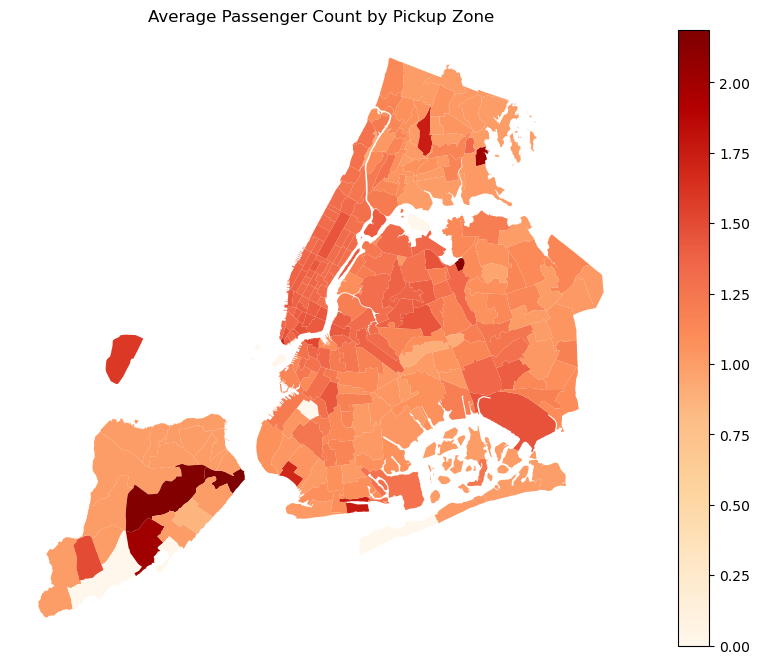

In [45]:
import matplotlib.pyplot as plt

# Plot a map of average passenger count by zone
zones_with_passenger.plot(column="avg_passenger_count", cmap="OrRd", legend=True, figsize=(12, 8))
plt.title("Average Passenger Count by Pickup Zone")
plt.axis("off")
plt.show()


In [51]:
# 1. Load the lookup file
zones_lookup = pd.read_csv('taxi_zone_lookup.csv')

# 2. Reset and rename the extra charge percentage dataframe
extra_pickup_percentage_df = extra_pickup_percentage.reset_index()
extra_pickup_percentage_df.columns = ['PULocationID', 'extra_charge_pct']

# 3. Merge with the zone lookup to get zone names
extra_pickup_percentage_named = extra_pickup_percentage_df.merge(
    zones_lookup, left_on='PULocationID', right_on='LocationID'
)[['Zone', 'extra_charge_pct']]

# 4. Rename columns for clarity
extra_pickup_percentage_named.columns = ['zone', 'extra_charge_pct']

# 5. Show top 10 zones with highest extra charge percentages
print(extra_pickup_percentage_named.head(10))


                        zone  extra_charge_pct
0                Westerleigh        100.000000
1          LaGuardia Airport         97.816697
2            Lower East Side         80.068913
3    Greenwich Village South         77.744384
4               East Village         74.418075
5               West Village         73.045056
6        Little Italy/NoLiTa         70.593153
7              East Elmhurst         70.415239
8              Alphabet City         68.801708
9  Times Sq/Theatre District         67.451882


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [60]:
# How often is each surcharge applied?
# Group trips by pickup zone and count those with extra > 0
extra_by_pickup_zone = df[df["extra"] > 0].groupby("PULocationID").size()
total_by_pickup_zone = df.groupby("PULocationID").size()

# Calculate percentage of trips with extra charges per pickup zone
extra_pickup_pct = (extra_by_pickup_zone / total_by_pickup_zone * 100).fillna(0)

# Load zone lookup and merge for zone names
zones_lookup = pd.read_csv('taxi_zone_lookup.csv')
extra_pickup_pct_named = extra_pickup_pct.reset_index().merge(
    zones_lookup, left_on="PULocationID", right_on="LocationID"
)[["Zone", 0]]

# Rename for clarity
extra_pickup_pct_named.columns = ["zone", "extra_charge_pct"]

# Sort and show top 10
extra_pickup_pct_named.sort_values("extra_charge_pct", ascending=False).head(10)


zone  extra_charge_pct
243                Westerleigh        100.000000
131          LaGuardia Airport         97.816697
141            Lower East Side         80.068913
107    Greenwich Village South         77.744384
77                East Village         74.418075
241               West Village         73.045056
137        Little Italy/NoLiTa         70.593153
68               East Elmhurst         70.415239
3                Alphabet City         68.801708
222  Times Sq/Theatre District         67.451882

In [61]:
# Similar to pickup zone
extra_by_dropoff_zone = df[df["extra"] > 0].groupby("DOLocationID").size()
total_by_dropoff_zone = df.groupby("DOLocationID").size()

extra_dropoff_pct = (extra_by_dropoff_zone / total_by_dropoff_zone * 100).fillna(0)

extra_dropoff_pct_named = extra_dropoff_pct.reset_index().merge(
    zones_lookup, left_on="DOLocationID", right_on="LocationID"
)[["Zone", 0]]

extra_dropoff_pct_named.columns = ["zone", "extra_charge_pct"]

extra_dropoff_pct_named.sort_values("extra_charge_pct", ascending=False).head(10)

zone  extra_charge_pct
134  LaGuardia Airport         88.972082
172            Oakwood         81.250000
39     Carroll Gardens         78.953923
252    Windsor Terrace         77.796053
53     Columbia Street         77.424483
185   Prospect Heights         76.702642
218           Steinway         76.542341
51         Cobble Hill         76.353127
175        Old Astoria         75.930194
6              Astoria         75.787402

In [62]:
# Create hour column if not yet done
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Calculate percentage of trips with extra by hour
extra_by_hour = df[df["extra"] > 0].groupby("hour").size()
total_by_hour = df.groupby("hour").size()

extra_hour_pct = (extra_by_hour / total_by_hour * 100).fillna(0)

# Show hourly distribution
extra_hour_pct.sort_values(ascending=False)



hour
21    94.466848
22    93.913885
20    93.535537
2     93.504063
1     93.486494
23    92.885665
0     92.445688
3     92.091388
4     83.661594
5     79.021529
19    78.260823
18    78.188653
17    77.511431
16    73.940888
6     31.531965
15    30.757417
14    30.610224
13    30.488417
12    30.014043
10    29.945288
11    29.669743
9     29.449131
8     28.729554
7     28.632804
dtype: float64

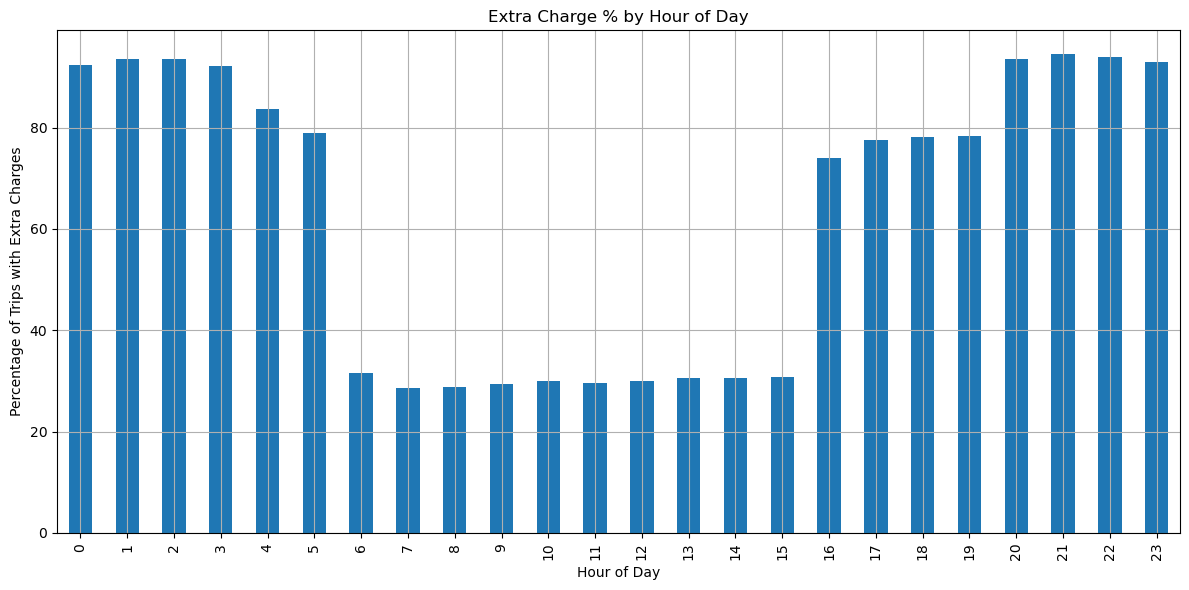

In [63]:
import matplotlib.pyplot as plt

extra_hour_pct.plot(kind='bar', figsize=(12, 6), title='Extra Charge % by Hour of Day')
plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Trips with Extra Charges")
plt.grid(True)
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.